In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

import sys
sys.path.insert(0, "..")   
from src.gdkm import GeneralizedDoubleKMeans, generalized_double_kmeans
from sklearn.datasets import make_checkerboard
from src.utils import reorder_data
from src.plot_util import plot_with_cluster_boundaries_from_model


In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_56143/2840768838.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


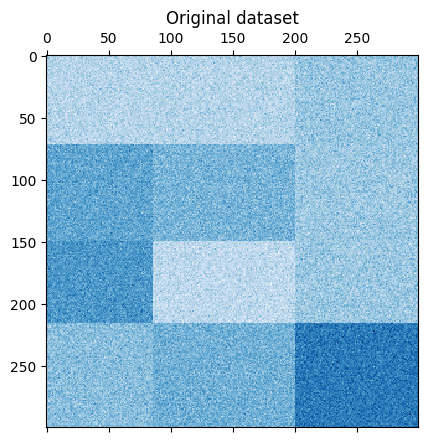

In [113]:
n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=42
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
fn = "../output/figures/20250619_checkboard_clustering.tiff"
plt.tight_layout()
plt.savefig(fn, dpi=300)
plt.show()
plt.close()


In [83]:

# Creating lists of shuffled row and column indices
rng = np.random.RandomState(0)
row_idx_shuffled = rng.permutation(data.shape[0])
col_idx_shuffled = rng.permutation(data.shape[1])

/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_56143/2678632546.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


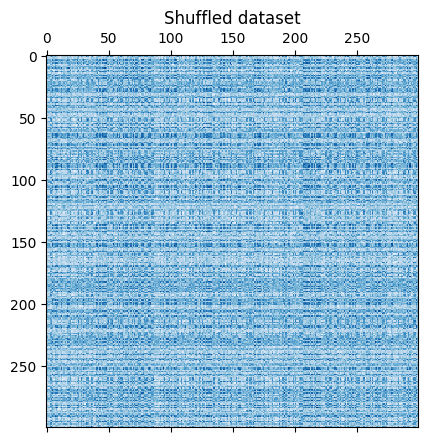

In [114]:
data = data[row_idx_shuffled][:, col_idx_shuffled]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
fn = "../output/figures/20250619_shuffled_checkboard_clustering.tiff"
plt.tight_layout()
plt.savefig(fn, dpi=300)
plt.show()
plt.close()

In [87]:

sc_model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
sc_model.fit(data)

# Compute the similarity of two sets of biclusters
score = consensus_score(
    sc_model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled])
)
print(f"consensus score: {score:.1f}")

consensus score: 1.0


In [89]:
%pwd

'/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook'

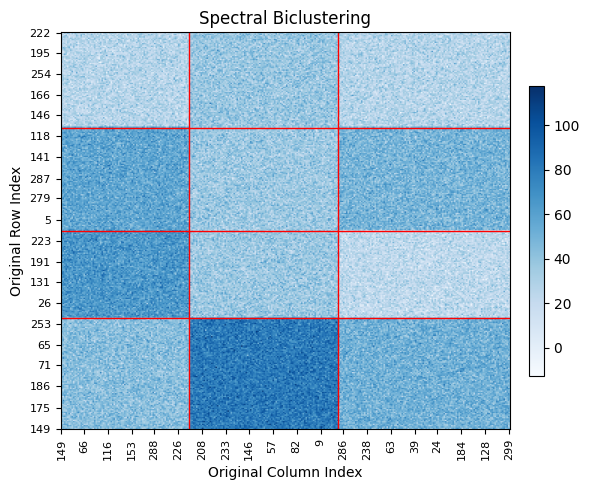

In [91]:
fn = "../output/figures/20250619_sc_shuffled_checkboard_clustering.tiff"
plot_with_cluster_boundaries_from_model(data, sc_model, title="Spectral Biclustering", fn=fn)

In [110]:
gdkm_model = GeneralizedDoubleKMeans(
        n_row_clusters=4,
        n_col_clusters_list=[3]*4,
        max_iter=100,
        tol=1e-4,
        random_state=0,
        norm="l2",
    )
gdkm_model.fit(data)
print(gdkm_model.biclusters_[0].shape)
# Compute the similarity of two sets of biclusters
score = consensus_score(
    gdkm_model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled])
)
print(f"consensus score: {score:.1f}")


Iteration 0: Loss=3.02e+07, max X=117.79378997651986, max cp=47.60891804621453
Iteration 1: Loss=1.72e+07, max X=117.79378997651986, max cp=66.75660607309086
Iteration 2: Loss=1.49e+07, max X=117.79378997651986, max cp=83.59337669883134
Iteration 3: Loss=1.41e+07, max X=117.79378997651986, max cp=82.58119737573487
Iteration 4: Loss=1.38e+07, max X=117.79378997651986, max cp=82.1639881236602
Iteration 5: Loss=1.38e+07, max X=117.79378997651986, max cp=81.89273675414199
Iteration 6: Loss=1.38e+07, max X=117.79378997651986, max cp=81.81069028793894
Iteration 7: Loss=1.38e+07, max X=117.79378997651986, max cp=81.76705121098303
Iteration 8: Loss=1.38e+07, max X=117.79378997651986, max cp=81.7451290820002
Iteration 9: Loss=1.38e+07, max X=117.79378997651986, max cp=81.7236676068722
Iteration 10: Loss=1.38e+07, max X=117.79378997651986, max cp=81.68285584785473
Iteration 11: Loss=1.38e+07, max X=117.79378997651986, max cp=81.66304554696148
Iteration 12: Loss=1.38e+07, max X=117.79378997651986

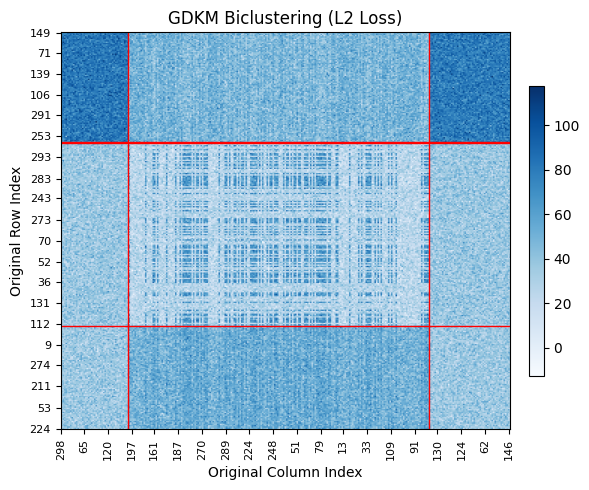

In [111]:
fn = "../output/figures/20250619_gdkm_shuffled_checkboard_clustering_l2.tiff"
plot_with_cluster_boundaries_from_model(data, gdkm_model, title="GDKM Biclustering (L2 Loss)", fn=fn)

Text(0, 0.5, 'Count')

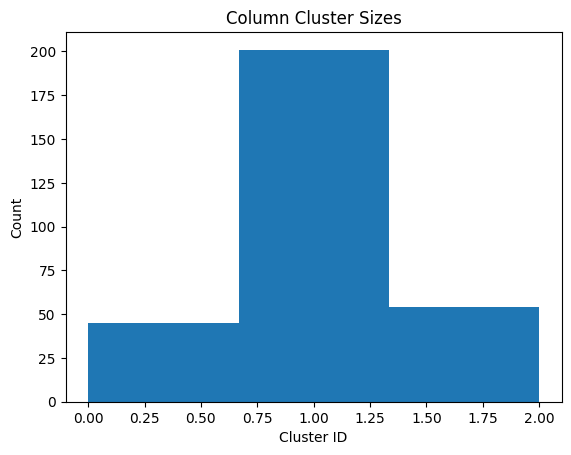

In [14]:
import matplotlib.pyplot as plt
_, col_labels = gdkm_model.row_labels_, gdkm_model.column_labels_
plt.hist(col_labels, bins=np.max(col_labels)+1)
plt.title("Column Cluster Sizes")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
